ANN with Keras

In [1]:
# Common imports
import numpy as np
import os
import pandas as pd


In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [3]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.3.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:




In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [7]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):


In [8]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

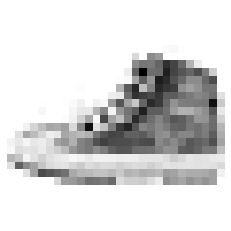

In [10]:
plt.imshow(X_train[2], cmap="binary")
plt.axis('off')
plt.show()

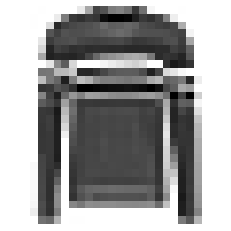

In [11]:
plt.imshow(X_valid[5], cmap="binary")
plt.axis('off')
plt.show()

# Construct a Model

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
keras.backend.clear_session()
np.random.seed(42)

In [14]:
model.layers

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
model.get_layer(hidden1.name) is hidden1

True

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[ 2.2911191e-02, -5.8708005e-02,  4.5370430e-02, ...,
        -2.2972152e-03, -5.5450216e-02, -4.2617127e-02],
       [-3.6927018e-02, -1.4033180e-02,  2.0132393e-02, ...,
        -9.9882483e-05,  4.4874184e-02,  7.0811346e-02],
       [-1.2022950e-02,  6.1899021e-02,  5.1863983e-02, ...,
        -7.0949391e-02, -2.1513250e-02,  5.2242726e-02],
       ...,
       [ 1.7104685e-02,  3.4921594e-02, -3.0493464e-02, ...,
        -3.6960740e-02,  5.0434232e-02,  4.7588997e-02],
       [ 5.1727638e-02, -3.1420887e-02,  1.8634871e-03, ...,
        -2.2888627e-02, -2.8738428e-02, -7.4098557e-02],
       [ 4.6593972e-02, -4.6870880e-02, -6.8088330e-02, ...,
        -3.6399391e-02, -3.1928156e-02,  4.2066202e-03]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.


In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
#Here you can chose how many epochs you need and the batch size.
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7129 - accuracy: 0.7667 - val_loss: 0.5114 - val_accuracy: 0.8274
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4878 - accuracy: 0.8301 - val_loss: 0.4531 - val_accuracy: 0.8394
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4452 - accuracy: 0.8448 - val_loss: 0.4356 - val_accuracy: 0.8478
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4187 - accuracy: 0.8527 - val_loss: 0.4120 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3988 - accuracy: 0.8612 - val_loss: 0.3971 - val_accuracy: 0.8588
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3829 - accuracy: 0.8661 - val_loss: 0.3968 - val_accuracy: 0.8632
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3702 - accuracy: 0.8693 - val_loss: 0.3699 - val_accuracy:

In [25]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

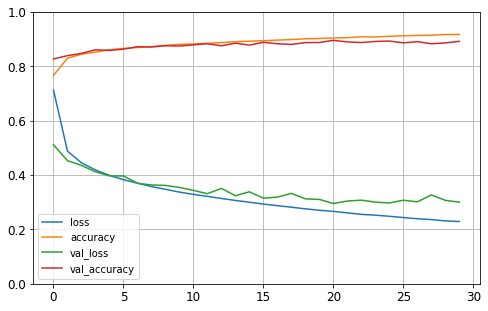

In [26]:
#Plot learning Curves
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8831


[0.3343609571456909, 0.8830999732017517]

1. Plot Learning curves when using different optimizers

First optimizer ADAM

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [29]:
history0 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3737 - accuracy: 0.8642 - val_loss: 0.3357 - val_accuracy: 0.8774
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3297 - accuracy: 0.8782 - val_loss: 0.3489 - val_accuracy: 0.8770
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3067 - accuracy: 0.8858 - val_loss: 0.3218 - val_accuracy: 0.8802
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2872 - accuracy: 0.8932 - val_loss: 0.3128 - val_accuracy: 0.8828
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2732 - accuracy: 0.8981 - val_loss: 0.2990 - val_accuracy: 0.8906
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2634 - accuracy: 0.9016 - val_loss: 0.3225 - val_accuracy: 0.8858
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2509 - accuracy: 0.9049 - val_loss: 0.3067 - val_accuracy:

In [30]:
history0.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

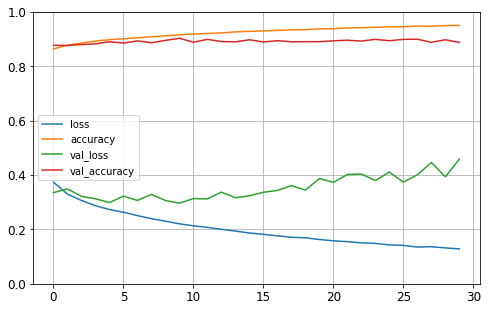

In [31]:
pd.DataFrame(history0.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Second optimizer RMSprop

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [33]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1274 - accuracy: 0.9522 - val_loss: 0.5555 - val_accuracy: 0.9024
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1362 - accuracy: 0.9506 - val_loss: 0.6248 - val_accuracy: 0.8968
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1444 - accuracy: 0.9483 - val_loss: 0.6677 - val_accuracy: 0.8976
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1466 - accuracy: 0.9481 - val_loss: 0.7168 - val_accuracy: 0.8970
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1571 - accuracy: 0.9462 - val_loss: 0.7711 - val_accuracy: 0.8924
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1600 - accuracy: 0.9474 - val_loss: 0.7296 - val_accuracy: 0.8982
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1642 - accuracy: 0.9457 - val_loss: 0.8210 - val_accuracy:

In [34]:
history1.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

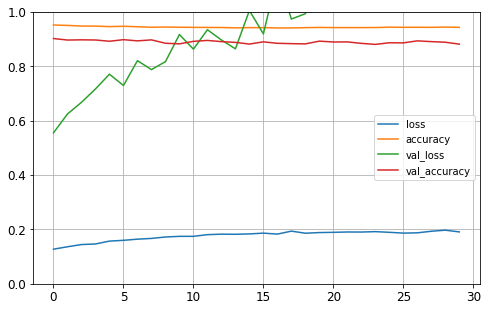

In [35]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Third optimizer Nadam

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Nadam",
              metrics=["accuracy"])

In [37]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2376 - accuracy: 0.9348 - val_loss: 0.8511 - val_accuracy: 0.8844
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2059 - accuracy: 0.9379 - val_loss: 0.7443 - val_accuracy: 0.8876
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1824 - accuracy: 0.9405 - val_loss: 0.7638 - val_accuracy: 0.8900
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1689 - accuracy: 0.9422 - val_loss: 0.7989 - val_accuracy: 0.8898
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1628 - accuracy: 0.9456 - val_loss: 0.8624 - val_accuracy: 0.8888
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1583 - accuracy: 0.9467 - val_loss: 0.7454 - val_accuracy: 0.8952
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1485 - accuracy: 0.9489 - val_loss: 0.7916 - val_ac

In [38]:
history2.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

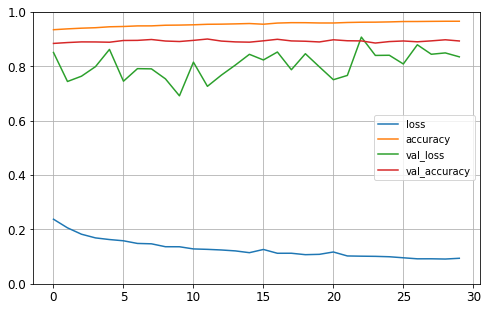

In [39]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

2. Plot Learning curves when using different batch size

First batch size is 10

In [40]:
history3 = model.fit(X_train, y_train, batch_size=10, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
5500/5500 [==============================] - 34s 6ms/step - loss: 0.1795 - accuracy: 0.9406 - val_loss: 0.7691 - val_accuracy: 0.8924
Epoch 2/30
5500/5500 [==============================] - 34s 6ms/step - loss: 0.1544 - accuracy: 0.9463 - val_loss: 0.7789 - val_accuracy: 0.8894
Epoch 3/30
5500/5500 [==============================] - 33s 6ms/step - loss: 0.1585 - accuracy: 0.9466 - val_loss: 0.7881 - val_accuracy: 0.8802
Epoch 4/30
5500/5500 [==============================] - 34s 6ms/step - loss: 0.1592 - accuracy: 0.9465 - val_loss: 0.7777 - val_accuracy: 0.8914
Epoch 5/30
5500/5500 [==============================] - 34s 6ms/step - loss: 0.1546 - accuracy: 0.9466 - val_loss: 0.6885 - val_accuracy: 0.8876
Epoch 6/30
5500/5500 [==============================] - 36s 7ms/step - loss: 0.1513 - accuracy: 0.9468 - val_loss: 0.7653 - val_accuracy: 0.8912
Epoch 7/30
5500/5500 [==============================] - 34s 6ms/step - loss: 0.1463 - accuracy: 0.9496 - val_loss: 0.8271 - val_ac

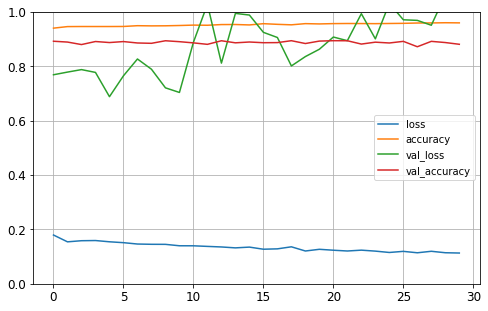

In [41]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Second batch size is 40

In [42]:
history4 = model.fit(X_train, y_train, batch_size=40, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1375/1375 [==============================] - 10s 8ms/step - loss: 0.0641 - accuracy: 0.9758 - val_loss: 1.0644 - val_accuracy: 0.9010
Epoch 2/30
1375/1375 [==============================] - 10s 7ms/step - loss: 0.0561 - accuracy: 0.9789 - val_loss: 1.0516 - val_accuracy: 0.8984
Epoch 3/30
1375/1375 [==============================] - 10s 7ms/step - loss: 0.0602 - accuracy: 0.9773 - val_loss: 1.1277 - val_accuracy: 0.8994
Epoch 4/30
1375/1375 [==============================] - 9s 7ms/step - loss: 0.0594 - accuracy: 0.9773 - val_loss: 1.1107 - val_accuracy: 0.8962
Epoch 5/30
1375/1375 [==============================] - 9s 7ms/step - loss: 0.0623 - accuracy: 0.9765 - val_loss: 1.2264 - val_accuracy: 0.8948
Epoch 6/30
1375/1375 [==============================] - 9s 7ms/step - loss: 0.0582 - accuracy: 0.9780 - val_loss: 1.2152 - val_accuracy: 0.8930
Epoch 7/30
1375/1375 [==============================] - 10s 7ms/step - loss: 0.0617 - accuracy: 0.9768 - val_loss: 1.2065 - val_accur

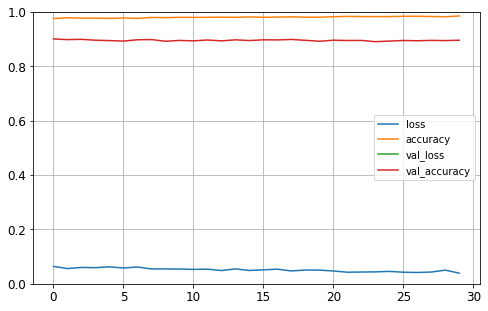

In [43]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

3. Plot Learning curves when using different number of epochs

First epoch is 12

In [44]:
history5 = model.fit(X_train, y_train, batch_size=32, epochs=12,
                    validation_data=(X_valid, y_valid))

Epoch 1/12
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0536 - accuracy: 0.9802 - val_loss: 1.4644 - val_accuracy: 0.8902
Epoch 2/12
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0494 - accuracy: 0.9828 - val_loss: 1.5602 - val_accuracy: 0.8936
Epoch 3/12
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0478 - accuracy: 0.9837 - val_loss: 1.4331 - val_accuracy: 0.8982
Epoch 4/12
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0439 - accuracy: 0.9842 - val_loss: 1.3926 - val_accuracy: 0.8952
Epoch 5/12
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0427 - accuracy: 0.9844 - val_loss: 1.4700 - val_accuracy: 0.8952
Epoch 6/12
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0533 - accuracy: 0.9819 - val_loss: 1.3599 - val_accuracy: 0.8940
Epoch 7/12
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0421 - accuracy: 0.9844 - val_loss: 1.4745 - val_ac

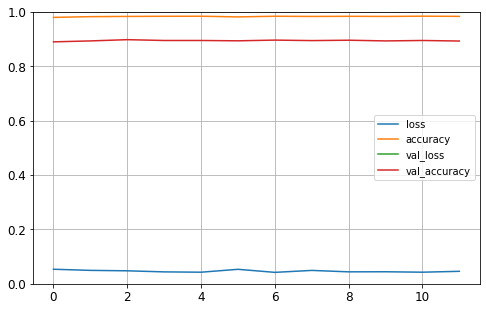

In [45]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Second epoch is 44

In [46]:
history5 = model.fit(X_train, y_train, batch_size=32, epochs=44,
                    validation_data=(X_valid, y_valid))

Epoch 1/44
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0415 - accuracy: 0.9852 - val_loss: 1.5375 - val_accuracy: 0.8946
Epoch 2/44
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0476 - accuracy: 0.9834 - val_loss: 1.7231 - val_accuracy: 0.8898
Epoch 3/44
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0400 - accuracy: 0.9862 - val_loss: 1.6807 - val_accuracy: 0.8926
Epoch 4/44
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0408 - accuracy: 0.9848 - val_loss: 1.6029 - val_accuracy: 0.8948
Epoch 5/44
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0393 - accuracy: 0.9854 - val_loss: 1.7263 - val_accuracy: 0.8976
Epoch 6/44
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0507 - accuracy: 0.9827 - val_loss: 1.6462 - val_accuracy: 0.8922
Epoch 7/44
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0369 - accuracy: 0.9868 - val_loss: 1.6778 - val_ac

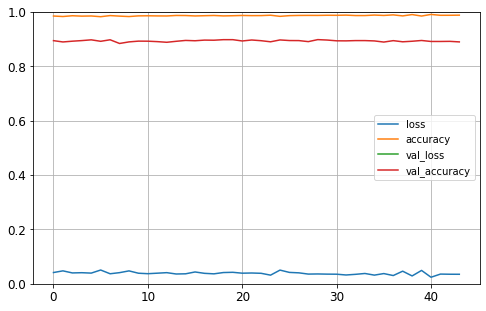

In [47]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

 4.Add additional neurons and use Dropout Layer. Plot Learning curves.

In [48]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add((keras.layers.Dropout(0.6)))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(70, activation="softmax"))

In [49]:
model.layers

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               60150     
_________________________________________________________________
dense_2 (Dense)              (None, 70)                10570     
Total params: 384,720
Trainable params: 384,720
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [52]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9773 - accuracy: 0.6715 - val_loss: 0.5819 - val_accuracy: 0.7954
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6098 - accuracy: 0.7865 - val_loss: 0.4842 - val_accuracy: 0.8348
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5375 - accuracy: 0.8092 - val_loss: 0.4554 - val_accuracy: 0.8416
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4956 - accuracy: 0.8249 - val_loss: 0.4100 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4685 - accuracy: 0.8318 - val_loss: 0.3972 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4481 - accuracy: 0.8413 - val_loss: 0.3823 - val_accuracy: 0.8634
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4343 - accuracy: 0.8433 - val_loss: 0.3797 - val_accuracy:

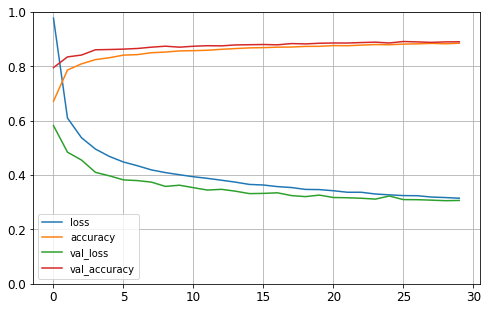

In [53]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

5.Use Batch Normalisation

In [54]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add((keras.layers.Dropout(0.6)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(70, activation="softmax"))

In [55]:
model.layers

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 400)               1600      
_________________________________________________________________
dense_4 (Dense)              (None, 150)               60150     
_________________________________________________________________
dense_5 (Dense)              (None, 70)                10570     
Total params: 386,320
Trainable params: 385,520
Non-trainable params: 800
______________________________________________

In [57]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [58]:
history8 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8589 - accuracy: 0.7197 - val_loss: 0.4801 - val_accuracy: 0.8340
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5728 - accuracy: 0.7904 - val_loss: 0.4240 - val_accuracy: 0.8468
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5299 - accuracy: 0.8074 - val_loss: 0.4038 - val_accuracy: 0.8548
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5052 - accuracy: 0.8164 - val_loss: 0.3907 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4853 - accuracy: 0.8245 - val_loss: 0.3772 - val_accuracy: 0.8616
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4760 - accuracy: 0.8269 - val_loss: 0.3700 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4640 - accuracy: 0.8309 - val_loss: 0.3581 - val_accuracy:

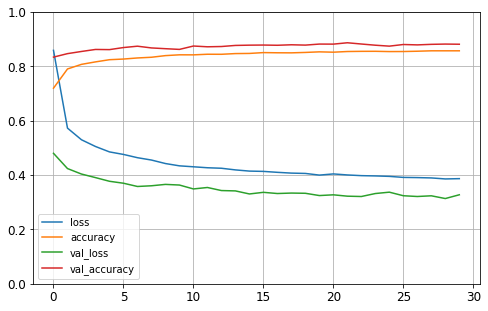

In [59]:
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

6. Repeat with more layers

In [60]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add((keras.layers.Dropout(0.3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(255, activation="relu"))
model.add(keras.layers.Dense(85, activation="tanh"))
model.add(keras.layers.Dense(36, activation="relu"))
model.add(keras.layers.Dense(12, activation="softmax"))

In [61]:
model.layers

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 255)               25755     
_________________________________________________________________
dense_8 (Dense)              (None, 85)                21760     
_________________________________________________________________
dense_9 (Dense)              (None, 36)               

In [63]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [64]:
history9 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7953 - accuracy: 0.7291 - val_loss: 0.4949 - val_accuracy: 0.8230
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5265 - accuracy: 0.8097 - val_loss: 0.4457 - val_accuracy: 0.8366
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4834 - accuracy: 0.8261 - val_loss: 0.3938 - val_accuracy: 0.8494
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4574 - accuracy: 0.8340 - val_loss: 0.3719 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4411 - accuracy: 0.8397 - val_loss: 0.3620 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4266 - accuracy: 0.8465 - val_loss: 0.3551 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4121 - accuracy: 0.8499 - val_loss: 0.3497 - val_accuracy:

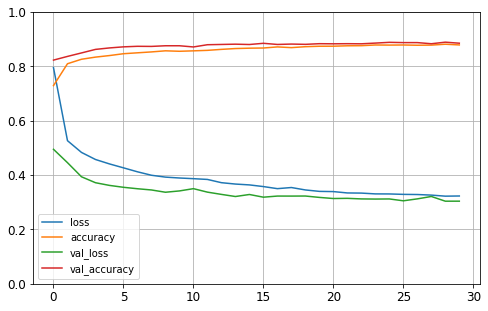

In [65]:
pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

7. Apply on different datasets

i choose mnist data 

In [70]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [71]:
X_train_full.shape

(60000, 28, 28)

In [72]:

X_valid, X_train = (X_train_full[:10000]) / 255., X_train_full[10000:] / 255.
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]
X_test = X_test / 255.

In [73]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

In [75]:
class_names[y_train[4]]

'9'

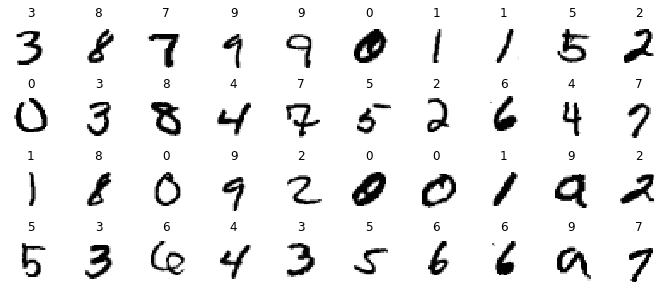

In [77]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

In [78]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add((keras.layers.Dropout(0.6)))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(70, activation="softmax"))

In [79]:
keras.backend.clear_session()
np.random.seed(42)

In [80]:
model.layers

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)               60150     
_________________________________________________________________
dense_13 (Dense)             (None, 70)                10570     
Total params: 384,720
Trainable params: 384,720
Non-trainable params: 0
_________________________________________________________________


In [82]:
hidden1 = model.layers[4]
hidden1.name

'dense_13'

In [83]:

weights, biases = hidden1.get_weights()

In [84]:
weights

array([[ 0.07748728,  0.05154255, -0.08820474, ..., -0.02374975,
         0.06008205,  0.07759701],
       [ 0.1570034 ,  0.15450552, -0.09203847, ...,  0.0810658 ,
         0.11402202, -0.14483991],
       [-0.05236763, -0.06367905,  0.02415641, ..., -0.02177088,
         0.06576785,  0.09267014],
       ...,
       [-0.11513522,  0.16303769,  0.10073084, ...,  0.0987865 ,
        -0.11458638, -0.02074355],
       [-0.16259642,  0.09731004,  0.08879223, ..., -0.13131353,
         0.07773925, -0.0987413 ],
       [ 0.09189263, -0.03767914,  0.03699817, ...,  0.00267094,
         0.10629091, -0.02695043]], dtype=float32)

In [85]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [86]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [87]:
historyc = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9150 - accuracy: 0.7304 - val_loss: 0.3650 - val_accuracy: 0.8984
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4238 - accuracy: 0.8747 - val_loss: 0.2794 - val_accuracy: 0.9199
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3423 - accuracy: 0.8986 - val_loss: 0.2335 - val_accuracy: 0.9338
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2953 - accuracy: 0.9125 - val_loss: 0.2106 - val_accuracy: 0.9398
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2595 - accuracy: 0.9239 - val_loss: 0.1840 - val_accuracy: 0.9460
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2359 - accuracy: 0.9303 - val_loss: 0.1700 - val_accuracy: 0.9495
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2196 - accuracy: 0.9350 - val_loss: 0.1573 - val_accuracy:

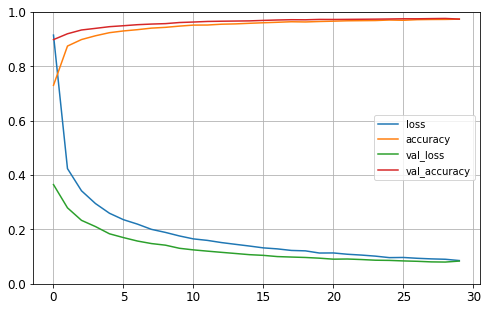

In [88]:
pd.DataFrame(historyc.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()